# Reviews length distribution
This notebook visualize the length of the reviews.

In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [121]:
df = pd.read_csv('../1-etl/reviews_clean.csv').fillna('')

In [122]:
reviews_length = list(map(lambda x: len(x), df['content']))

bins = [0, 20, 500, 2000, 6000]
bin_labels = ['few words (<20)','short (<500)', 'medium (<2000)', 'long (>2000)']
data_bins = pd.cut(reviews_length, bins=bins, labels=bin_labels, right=True)
reviews_lengths_df = pd.DataFrame({'Value': reviews_length, 'Bin': data_bins})
reviews_lengths_df = reviews_lengths_df.groupby(['Bin']).size().reset_index(name='Count')
reviews_lengths_df.head()

/tmp/ipykernel_49132/130855008.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reviews_lengths_df = reviews_lengths_df.groupby(['Bin']).size().reset_index(name='Count')


,Bin,Count
0,few words (<20),14
1,short (<500),328
2,medium (<2000),134
3,long (>2000),14


/tmp/ipykernel_49132/2071778913.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=reviews_lengths_df, x='Bin', y='Count', palette='crest', saturation=1, width=0.7)


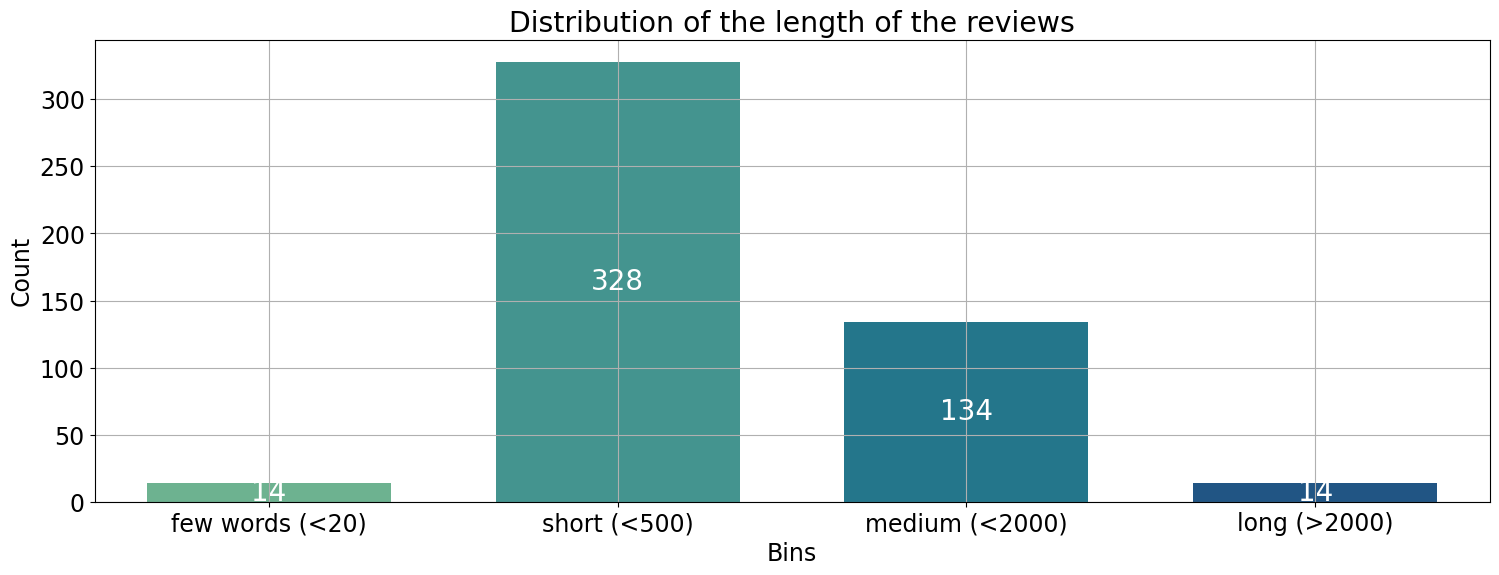

In [123]:
plt.rcParams.update({'font.size': 17})
plt.figure(figsize=(18, 6))
ax = sns.barplot(data=reviews_lengths_df, x='Bin', y='Count', palette='crest', saturation=1, width=0.7)

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height / 2,
                f'{int(height)}',
                ha='center',
                va='center',
                color='white',
                fontsize=20
            )

plt.title('Distribution of the length of the reviews')
plt.xlabel('Bins')
plt.ylabel('Count')
plt.grid()
plt.show()

/tmp/ipykernel_49132/2558536477.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(reviews_length, palette='crest', fill=True)


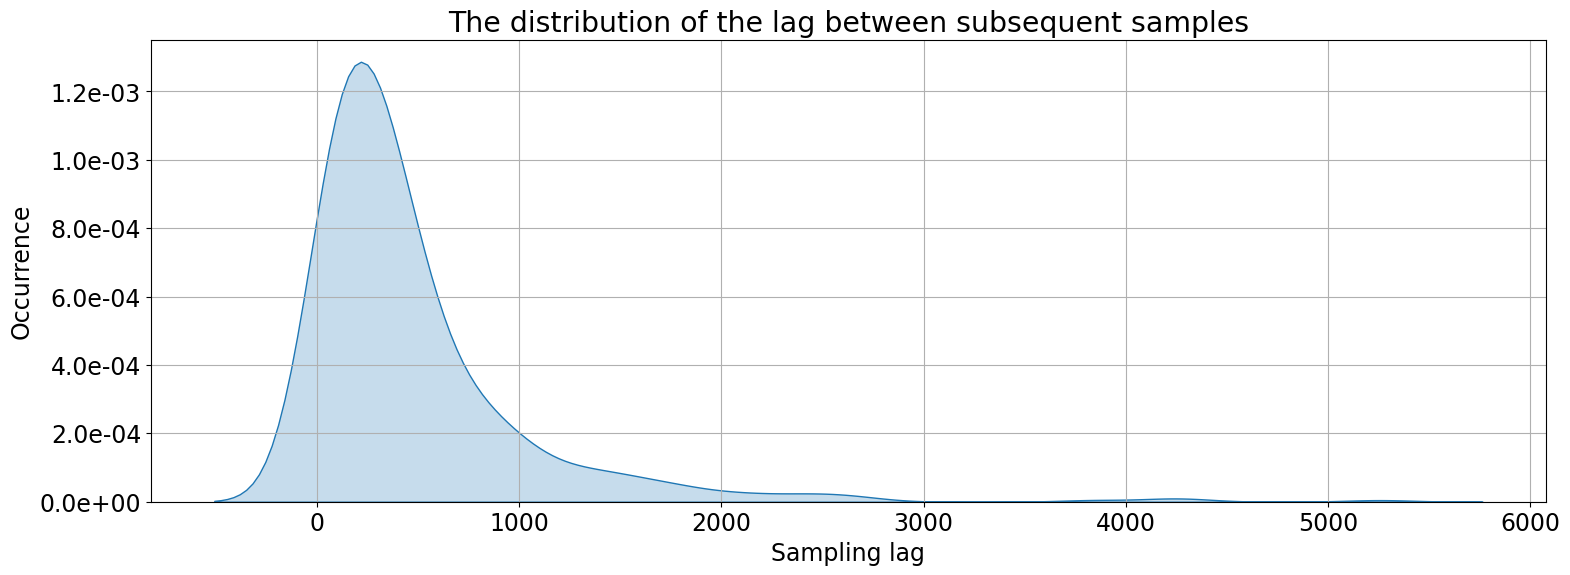

In [124]:
plt.figure(figsize=(18, 6))
sns.kdeplot(reviews_length, palette='crest', fill=True)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.1e}'))
plt.title('The distribution of the lag between subsequent samples')
plt.xlabel('Sampling lag')
plt.ylabel('Occurrence')
plt.grid()
plt.show()